Importing Required packeges

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

Import the CSV Data as Pandas DataFrame

In [9]:
df = pd.read_csv("/content/EVStats.csv")

Show Top 5 Records

In [10]:
df.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82


Shape of the dataset

In [11]:
df.shape

(30, 10)

In [12]:
df.columns

Index(['Sl. No', 'State',
       'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
       'Two Wheelers (Category L2 (CMVR))',
       'Two Wheelers (Max power not exceeding 250 Watts)',
       'Three Wheelers (Category L5 slow speed as per CMVR)',
       'Three Wheelers (Category L5 as per CMVR)',
       'Passenger Cars (Category M1 as per CMVR)', 'Buses', 'Total in state'],
      dtype='object')

Summary of the dataset

In [13]:
# Display summary statistics for a dataframe
df.describe()

,Sl. No,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,918.300000,468.966667,3751.266667,12.966667,24.000000,3519.033333,0.900000,8695.433333
std,8.803408,1482.441466,625.711098,4383.917198,30.737468,41.484521,4860.187299,3.835856,9911.814513
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
25%,8.250000,19.000000,18.500000,65.000000,0.000000,0.000000,222.250000,0.000000,589.500000
50%,15.500000,447.500000,222.500000,2113.000000,0.000000,0.500000,985.500000,0.000000,4206.000000
75%,22.750000,762.500000,706.250000,5003.750000,6.000000,33.750000,5303.250000,0.000000,13951.500000
max,30.000000,7182.000000,2355.000000,15199.000000,117.000000,139.000000,19129.000000,21.000000,34013.000000


Check Datatypes in the dataset

In [14]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Sl. No                                                              30 non-null     int64 
 1   State                                                               30 non-null     object
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  30 non-null     int64 
 3   Two Wheelers (Category L2 (CMVR))                                   30 non-null     int64 
 4   Two Wheelers (Max power not exceeding 250 Watts)                    30 non-null     int64 
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 30 non-null     int64 
 6   Three Wheelers (Category L5 as per CMVR)                            30 non-null     int64 
 7   Passenger Cars (Category M1 

Checking Null Values

In [15]:
df.isnull().sum()

Sl. No                                                                0
State                                                                 0
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    0
Two Wheelers (Category L2 (CMVR))                                     0
Two Wheelers (Max power not exceeding 250 Watts)                      0
Three Wheelers (Category L5 slow speed as per CMVR)                   0
Three Wheelers (Category L5 as per CMVR)                              0
Passenger Cars (Category M1 as per CMVR)                              0
Buses                                                                 0
Total in state                                                        0
dtype: int64

**EXPLORING DATA**

In [16]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Sl. No', 'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules', 'Two Wheelers (Category L2 (CMVR))', 'Two Wheelers (Max power not exceeding 250 Watts)', 'Three Wheelers (Category L5 slow speed as per CMVR)', 'Three Wheelers (Category L5 as per CMVR)', 'Passenger Cars (Category M1 as per CMVR)', 'Buses', 'Total in state']

We have 1 categorical features : ['State']


Univariate Analysis

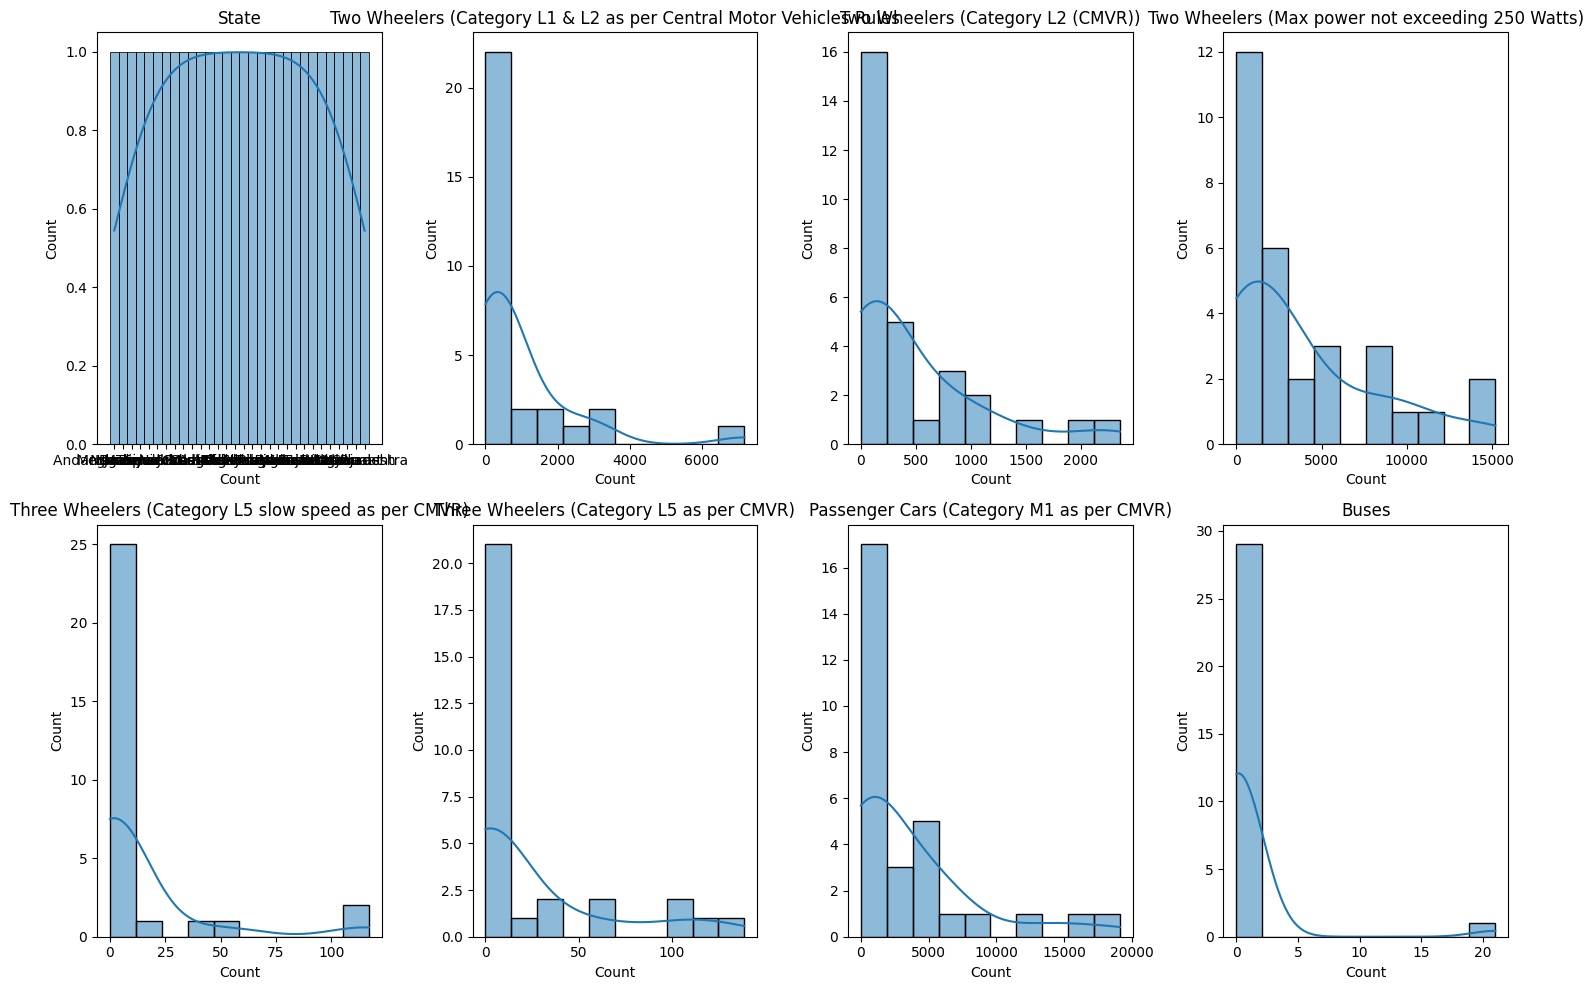

In [17]:
# Univariate analysis: Histograms for each variable
plt.figure(figsize=(15, 10))

# Iterate through each column (excluding 'State' and 'Total in state')
for i, column in enumerate(df.columns[1:-1], 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[column], bins=10, kde=True)
    plt.title(column)
    plt.xlabel('Count')

plt.tight_layout()
plt.show()

Multivariate Analysis

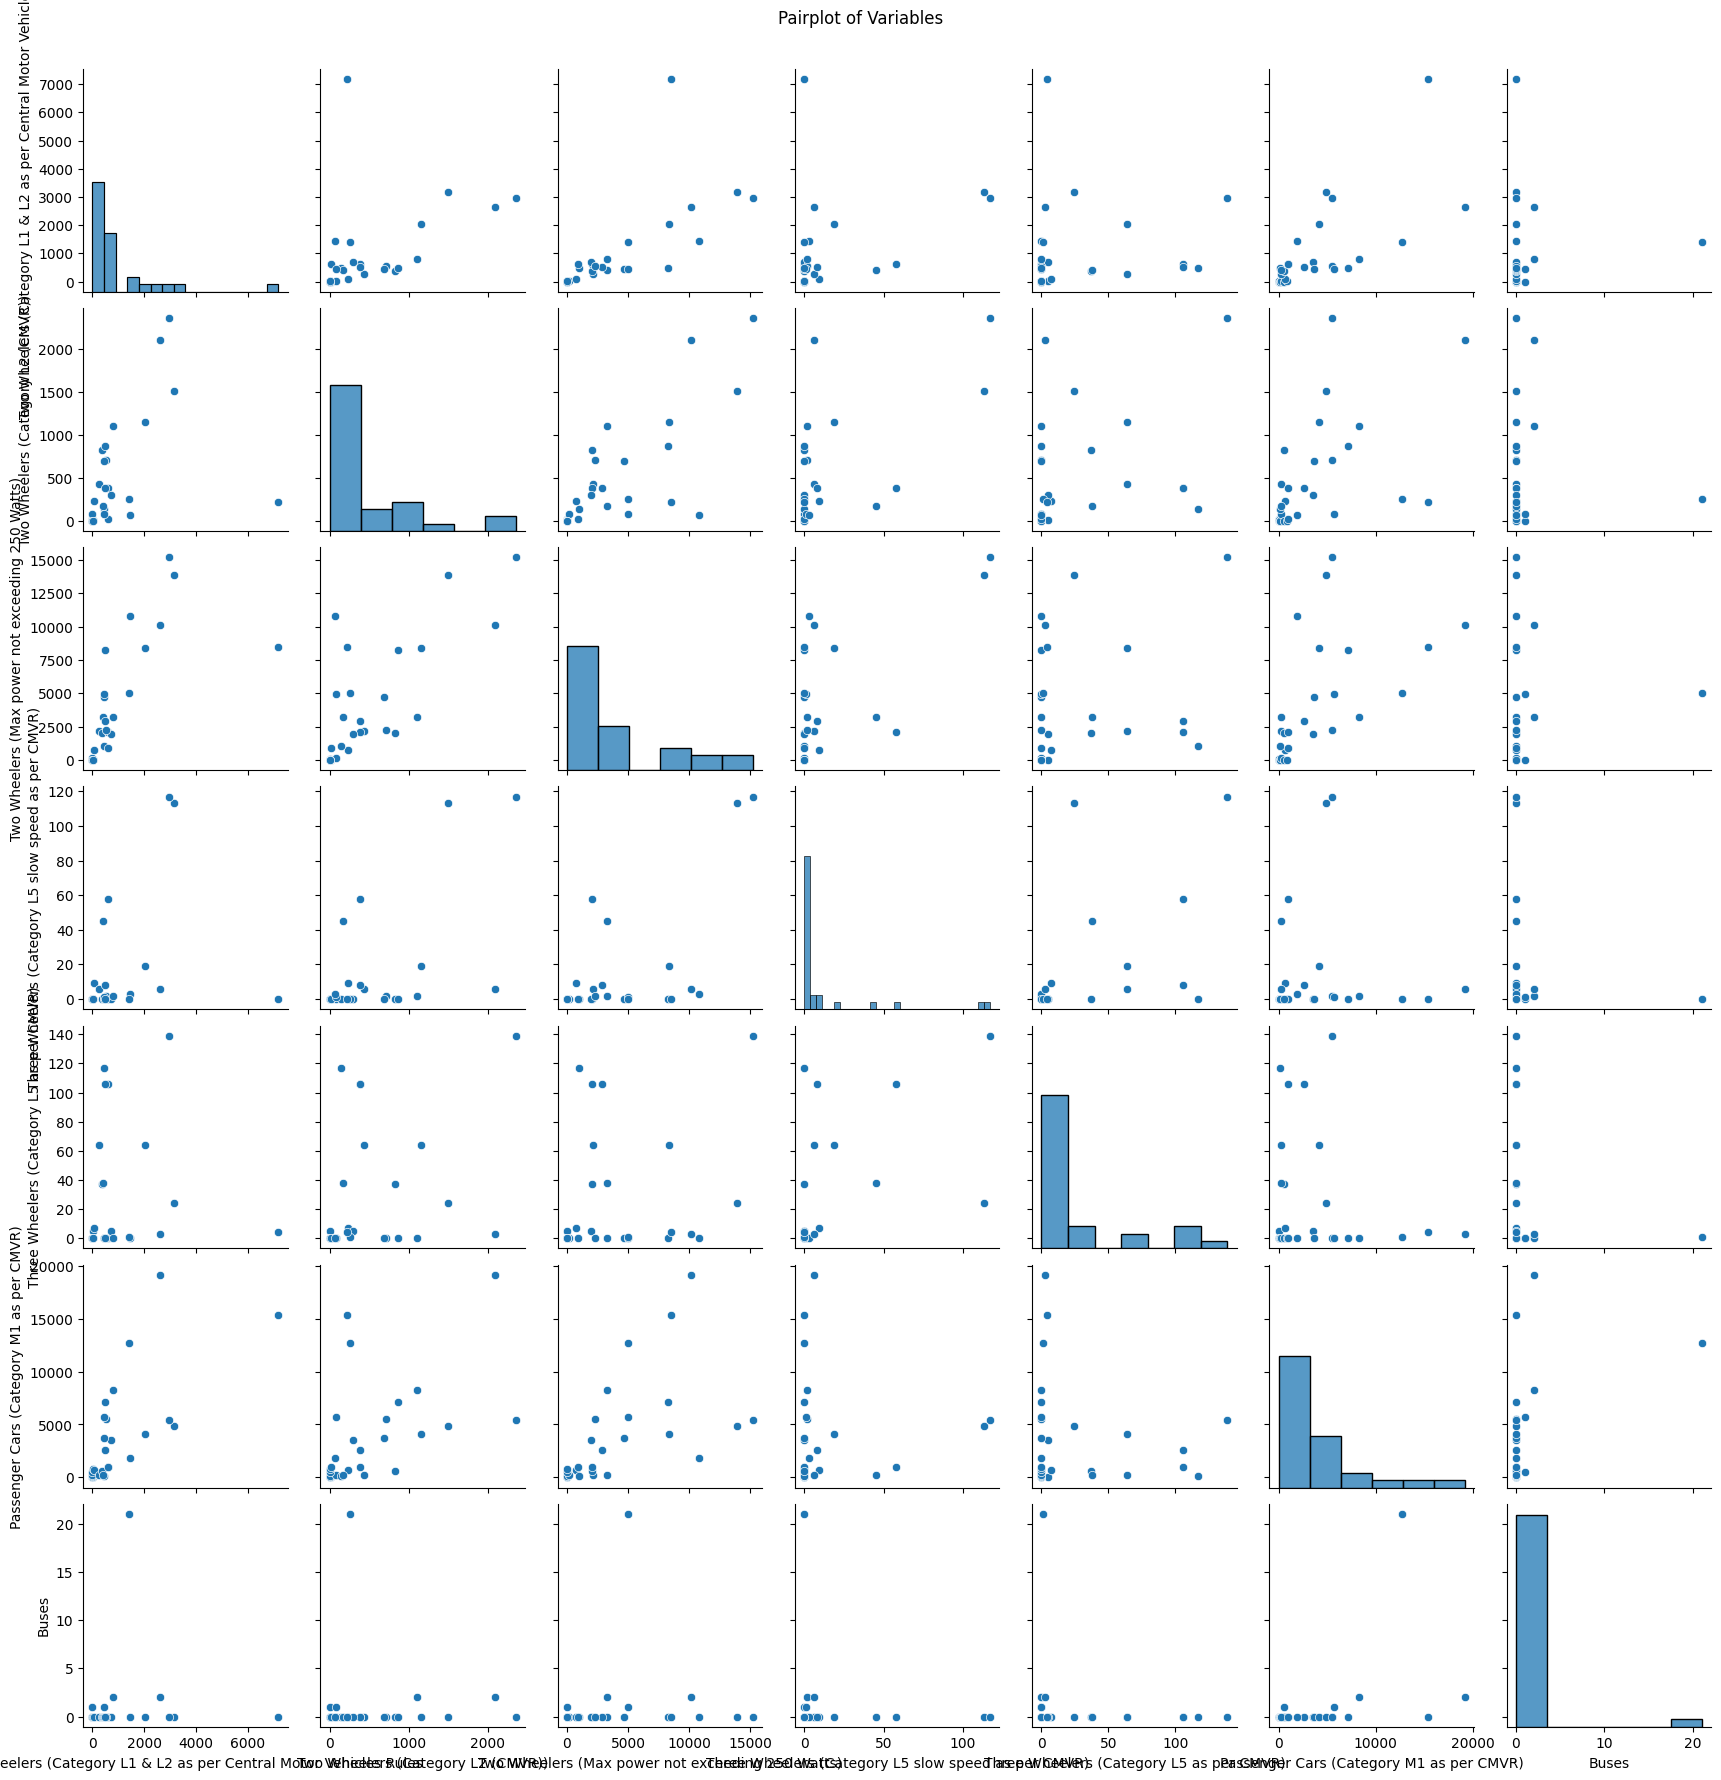

In [18]:
# Multivariate analysis: Pairplot
sns.pairplot(df.iloc[:, 1:-1])
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()

**Visualization**

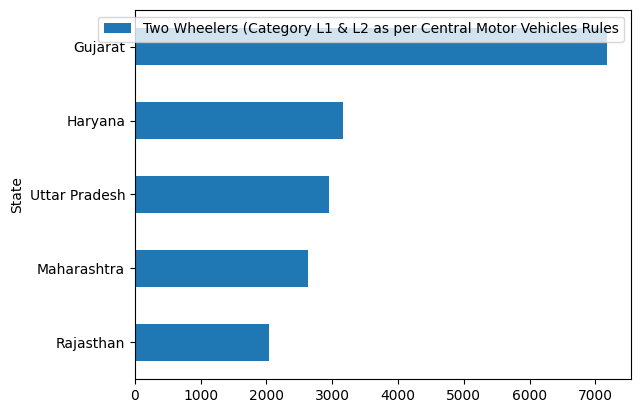

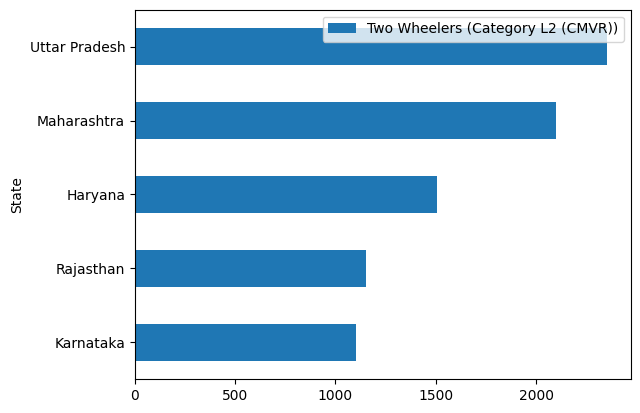

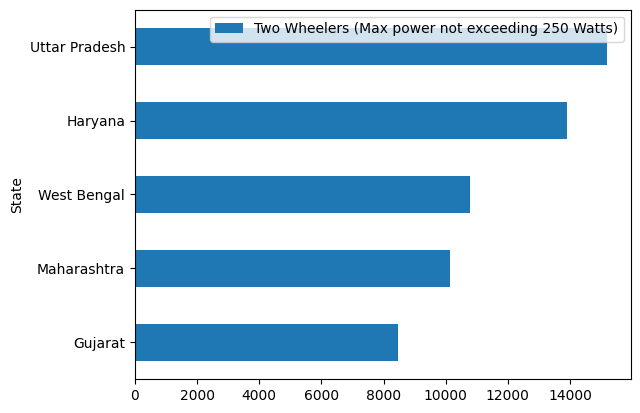

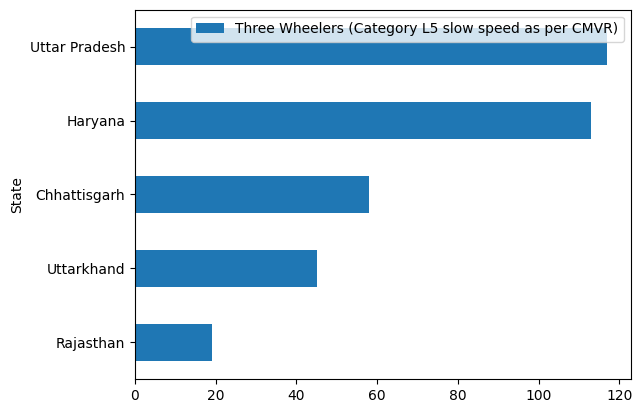

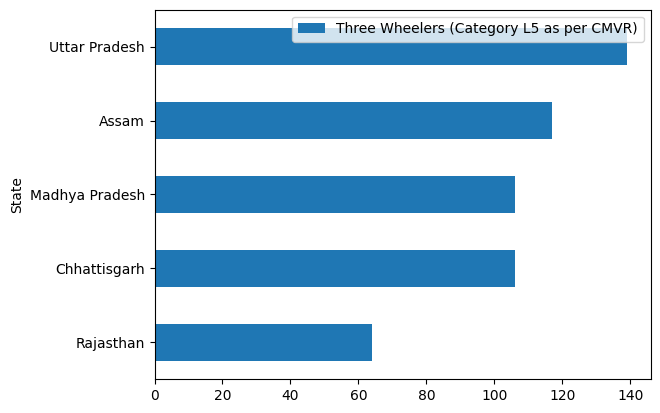

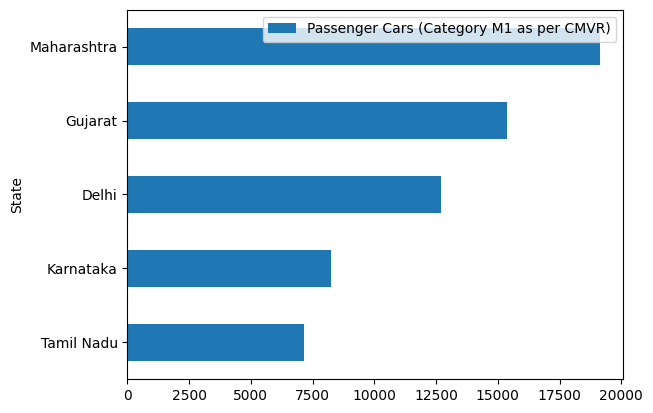

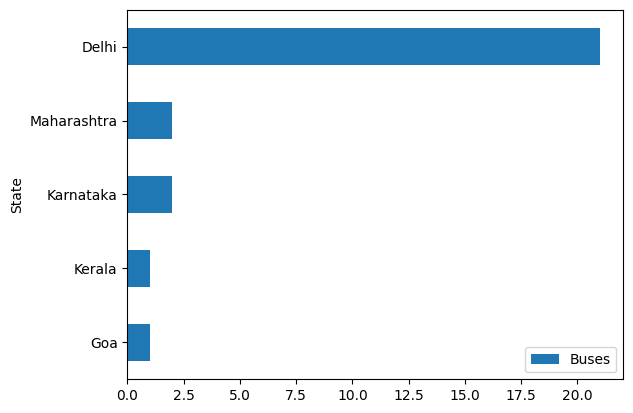

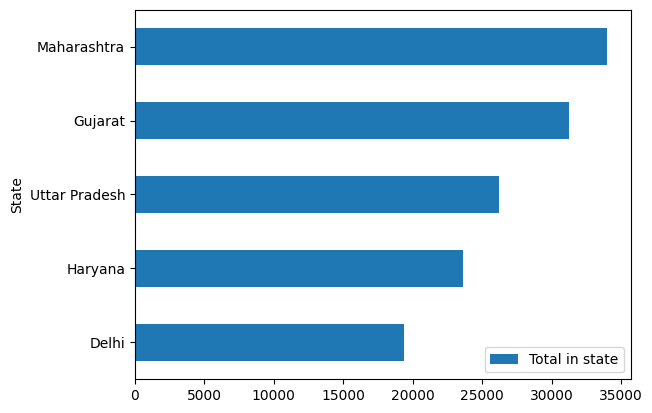

In [19]:
# Top 5 states for each category of Electric Vehicles
for y in ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules','Two Wheelers (Category L2 (CMVR))','Two Wheelers (Max power not exceeding 250 Watts)','Three Wheelers (Category L5 slow speed as per CMVR)','Three Wheelers (Category L5 as per CMVR)','Passenger Cars (Category M1 as per CMVR)','Buses','Total in state']:
  ax = df.sort_values(y, ascending=True).tail(5).plot.barh(x='State', y=y)

**Market Segment**

In [33]:
# Selecting numerical columns for clustering
X = df.drop(columns=['State', 'Total in state'])

In [34]:
# Normalizing the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


In [35]:
# Determining the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    sse.append(kmeans.inertia_)

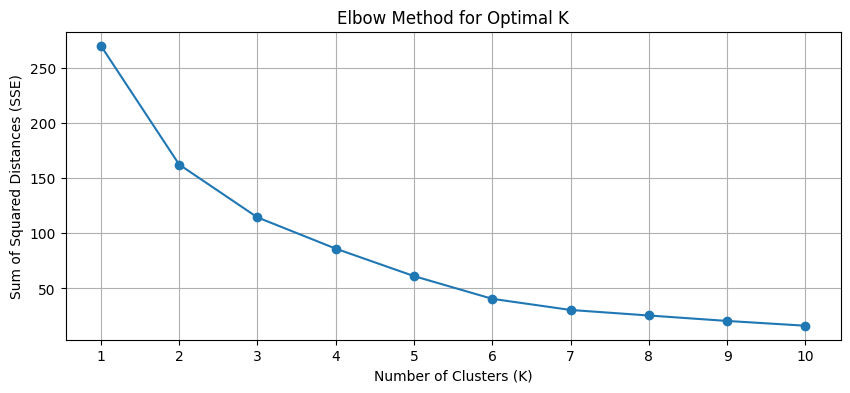

In [43]:
# Plotting the elbow curve
plt.figure(figsize=(10, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [37]:
# Based on the elbow curve, let's choose K=3 and perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_normalized)

In [38]:
# Adding cluster labels to the DataFrame
df['Cluster'] = clusters

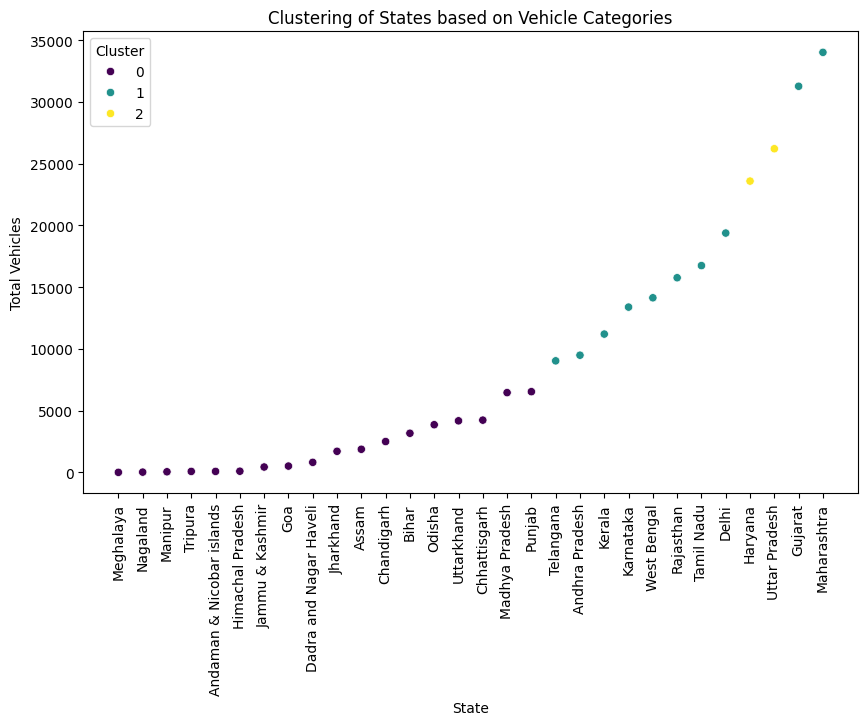

In [40]:
# Visualizing the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='State', y='Total in state', hue='Cluster', data=df, palette='viridis')
plt.title('Clustering of States based on Vehicle Categories')
plt.xlabel('State')
plt.ylabel('Total Vehicles')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.show()